## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Machine Learning In Class Exercise</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Tuesday, 13th October submitted via Canvas by 11:59 pm</p>

This exercise will take the place of Problem Set 4

# Exercise
Refer to the classification-clothing.ipynb. In this notebook, we worked with FashionMNIST dataset and developed a model. The predictions (on TPU) were made with a confidence score. In this exercise we will play around and mimic the results for MNSIT digit handwriting dataset. 

As a final step we will generate a graph of predictions along with their confidence score as shown below. 

Include the code and the graph in your submissions. The reference graph is given below. 

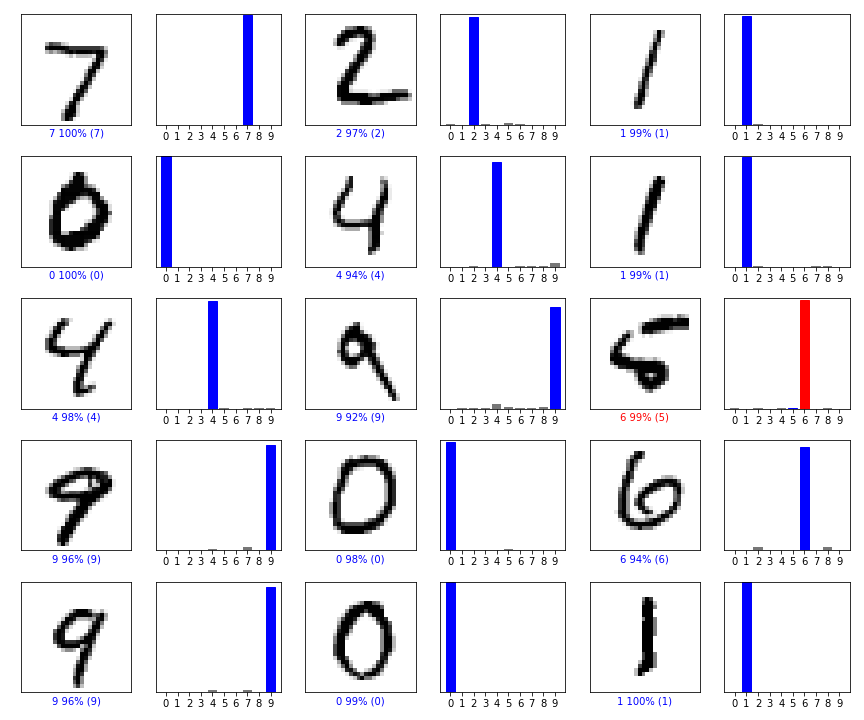

In [2]:
from IPython.display import Image
Image(filename=r'mnist.png')

In [43]:
from __future__ import absolute_import, division, print_function, unicode_literals
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [45]:
#Printing the shapes of x_train, y_train,x_test, y_test
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [46]:
#Labels are one of the 10 digits
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [47]:
#Names for the labels
class_names = ['zero','one','two','three','four','five','six','seven','eight','nine']

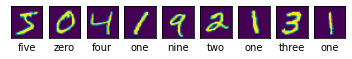

In [48]:
for i in range(9):
    plt.subplot(1,9,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [49]:
#Standardize the data so that each dimention will have the same size
X_train = X_train / 255.0

X_test = X_test / 255.0

In [50]:
# Creating and Compiling the learning model
# Keras is Tensorflow library
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# Building graph
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
#Learn from training set
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2622 - accuracy: 0.9253
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1138 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0775 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0573 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0438 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0279 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0225 - accuracy: 0.9930: 0s - loss: 0.0223 - accura
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0189 - accuracy: 0.9940: 0s - loss:
Epoch 10/10
1875/1875 [===================

In [52]:
#Prdicting from test set
predictions = model.predict(X_test)
predictions[0]

array([8.05280898e-10, 2.80110140e-08, 2.32376749e-08, 1.03448465e-05,
       5.84098904e-13, 2.92776647e-09, 5.94380878e-10, 9.99981761e-01,
       3.42181550e-09, 7.85562861e-06], dtype=float32)

In [53]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print('\nTest Loss:', test_loss)
print('\nTest accuracy:', test_accuracy)


Test Loss: 0.08130376040935516

Test accuracy: 0.9794999957084656


In [54]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format([predicted_label],
                                100*np.max(predictions_array),
                                [true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

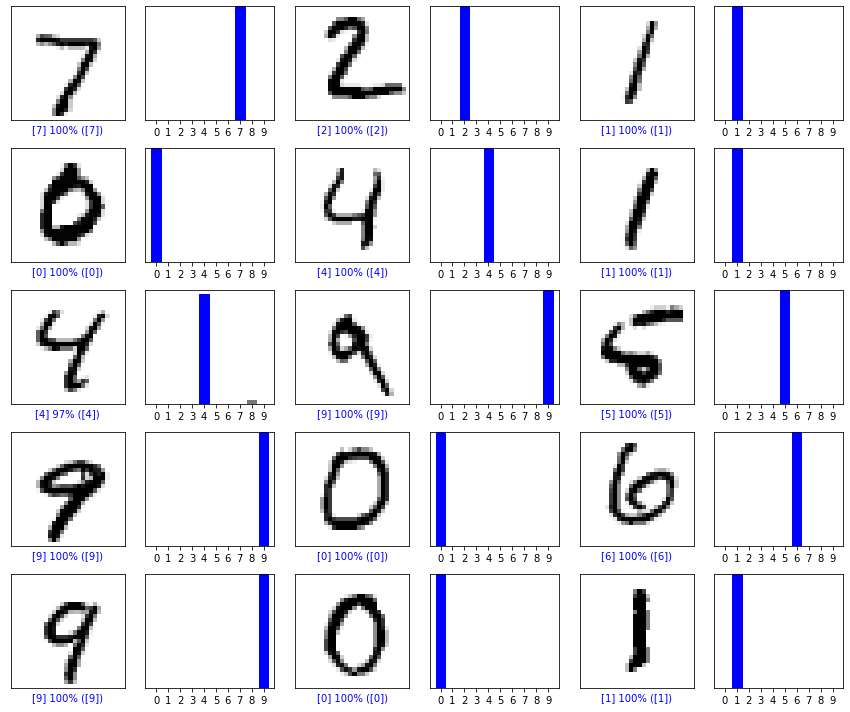

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### Lets see some incorrect Predictions

In [56]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [57]:
np.argmax(predictions[0])

7

In [58]:
predict = np.empty(len(predictions),dtype = np.uint8)

In [62]:
for i in range(len(predictions)):
    predict[i] = np.argmax(predictions[i])

predict

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [63]:
np.sum(y_test != predict)

205

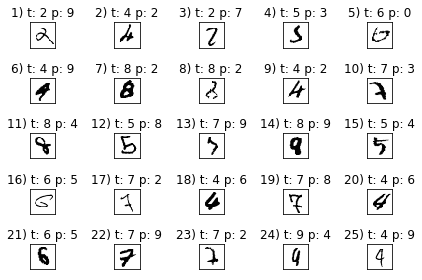

In [64]:
miscl_img = X_test[y_test != predict][:25]
correct_lab = y_test[y_test != predict][:25]
miscl_lab = predict[y_test != predict][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.savefig('misses.png', dpi=300)
plt.show()